In [1]:
from keras import models
from keras import layers
from keras.applications import VGG16

'''
Case II, Train full layers, conv_base + classifier, with augmented sample images.
This end-to-end training needs heavy resources.
'''

'''
Freeze weights to prevent changing on training.
Randomly initialized classifier layers propagate large update values to the network.
It makes trained weights huge change.
'''
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [3]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# Augmented samples generator.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Test and validation dataset must keep integrity.
validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
import os

dataset_dir = '/home/guhwanbae/workspace/machine-learning/resource/cats-and-dogs-small'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')
test_dir = os.path.join(dataset_dir, 'test')

In [6]:
input_shape = (150, 150)

# Make labels.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=input_shape,
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=input_shape,
                                                              batch_size=20,
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 25s 255ms/step - loss: 0.5883 - acc: 0.6980 - val_loss: 0.4491 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 23s 232ms/step - loss: 0.4816 - acc: 0.7980 - val_loss: 0.3688 - val_acc: 0.8570
Epoch 3/30
100/100 [==============================] - 23s 233ms/step - loss: 0.4410 - acc: 0.8125 - val_loss: 0.3410 - val_acc: 0.8570
Epoch 4/30
100/100 [==============================] - 23s 232ms/step - loss: 0.4038 - acc: 0.8195 - val_loss: 0.3204 - val_acc: 0.8720
Epoch 5/30
100/100 [==============================] - 23s 232ms/step - loss: 0.3795 - acc: 0.8325 - val_loss: 0.3100 - val_acc: 0.8690
Epoch 6/30
100/100 [==============================] - 23s 232ms/step - loss: 0.3761 - acc: 0.8415 - val_loss: 0.2809 - val_acc: 0.8830
Epoch 7/30
100/100 [==============================] - 23s 232ms/step - loss: 0.3528 - acc: 0.8515 - val_loss: 0.2746 - val_acc: 0.8850
Epoch 8/30
100/100 [==============================] - 2

In [14]:
model.save('dogs_and_cats_vgg16_with_augmented_samples_1.h5')

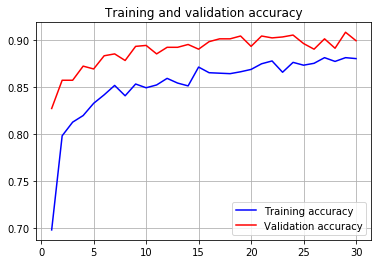

In [15]:
import numpy as np
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(len(acc)) + 1

plt.figure('Accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='b', label='Training accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation accuracy')
plt.legend()
plt.grid()
plt.show()

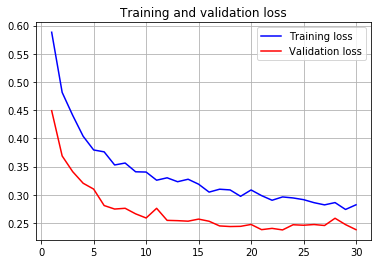

In [16]:
plt.figure('Loss')
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='b', label='Training loss')
plt.plot(epochs, val_loss, color='r', label='Validation loss')
plt.legend()
plt.grid()
plt.show()